<a href="https://colab.research.google.com/github/rameenirfanshaikh/Pandas/blob/main/Age%20prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data preparation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Loading and showing input and output data

In [ ]:
#df = pd.read_csv('https://raw.githubusercontent.com/sdiciotti/Age-Prediction-Demo/main/NKI2_data.csv')
df = pd.read_excel('https://raw.githubusercontent.com/sdiciotti/Age-Prediction-Demo/main/NKI2_data.xlsx')
print (type(df))
df.shape
print(df)

<class 'pandas.core.frame.DataFrame'>
    Age Sex  cortex_CT  lh_cortex_CT  rh_cortex_CT  lh_frontalGM_CT  \
0    13   F   2.563765       2.53793       2.58960            2.604   
1    13   M   2.816775       2.80403       2.82952            2.870   
2    16   F   2.590785       2.60300       2.57857            2.659   
3    17   M   2.618340       2.62847       2.60821            2.780   
4    17   M   2.737575       2.77298       2.70217            2.866   
..  ...  ..        ...           ...           ...              ...   
68   14   F   2.785335       2.80093       2.76974            2.956   
69   16   M   2.645850       2.62908       2.66262            2.793   
70   12   F   2.731690       2.73606       2.72732            2.854   
71   10   F   2.674965       2.67007       2.67986            2.749   
72   11   M   2.733215       2.74924       2.71719            2.846   

    lh_occipitalGM_CT  lh_temporalGM_CT  lh_parietalGM_CT  rh_frontalGM_CT  \
0               2.084          

Check the features and output variables name

In [ ]:
features = list(df.columns)
type(features)
print (features)

['Age', 'Sex', 'cortex_CT', 'lh_cortex_CT', 'rh_cortex_CT', 'lh_frontalGM_CT', 'lh_occipitalGM_CT', 'lh_temporalGM_CT', 'lh_parietalGM_CT', 'rh_frontalGM_CT', 'rh_occipitalGM_CT', 'rh_temporalGM_CT', 'rh_parietalGM_CT', 'cortex_pial_lgi', 'lh_cortex_pial_lgi', 'rh_cortex_pial_lgi', 'lh_frontal_pial_lgi', 'lh_occipital_pial_lgi', 'lh_temporal_pial_lgi', 'lh_parietal_pial_lgi', 'rh_frontal_pial_lgi', 'rh_occipital_pial_lgi', 'rh_temporal_pial_lgi', 'rh_parietal_pial_lgi', 'cerebralGM_FD', 'lh_cerebralGM_FD', 'lh_frontalGM_FD', 'lh_temporalGM_FD', 'lh_parietalGM_FD', 'lh_occipitalGM_FD', 'rh_cerebralGM_FD', 'rh_frontalGM_FD', 'rh_temporalGM_FD', 'rh_parietalGM_FD', 'rh_occipitalGM_FD']


Plotting some data

Text(0, 0.5, 'cortex CT (mm)')

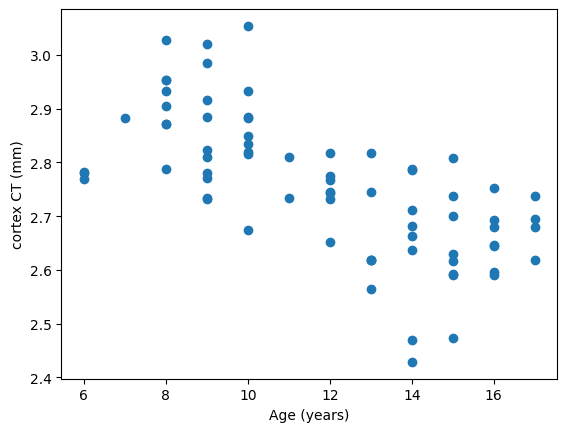

In [ ]:
plt.scatter(df['Age'],df['cortex_CT'])
plt.xlabel('Age (years)')
plt.ylabel('cortex CT (mm)')

In [ ]:
print("Dataframe shape before NaN removal:", df.shape)

Dataframe shape before NaN removal: (73, 35)


Removing missing data

In [ ]:
df.dropna(axis=0, how='any', inplace=True)
print("Dataframe shape after NaN removal:", df.shape)

Dataframe shape after NaN removal: (72, 35)


Preparing the design matrix X and the desired output y

In [ ]:
X = df.iloc[:,2::]
y = df['Age']
print (type(X))
print (type(y))
print (X.shape)
print (y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(72, 33)
(72,)


A brief quality control

In [ ]:
X.head(3)

,cortex_CT,lh_cortex_CT,rh_cortex_CT,lh_frontalGM_CT,lh_occipitalGM_CT,lh_temporalGM_CT,lh_parietalGM_CT,rh_frontalGM_CT,rh_occipitalGM_CT,rh_temporalGM_CT,...,lh_cerebralGM_FD,lh_frontalGM_FD,lh_temporalGM_FD,lh_parietalGM_FD,lh_occipitalGM_FD,rh_cerebralGM_FD,rh_frontalGM_FD,rh_temporalGM_FD,rh_parietalGM_FD,rh_occipitalGM_FD
0,2.563765,2.53793,2.58960,2.604,2.084,2.694,2.432,2.573,2.213,2.901,...,2.4527,2.3947,2.3795,2.3840,2.2441,2.4524,2.4001,2.3942,2.3788,2.2650
1,2.816775,2.80403,2.82952,2.870,2.265,3.188,2.564,2.914,2.244,3.230,...,2.4719,2.4216,2.4228,2.3896,2.2861,2.5181,2.4290,2.4202,2.3942,2.2631
2,2.590785,2.60300,2.57857,2.659,2.058,2.877,2.537,2.649,2.083,2.787,...,2.4854,2.3733,2.3712,2.3852,2.2485,2.4820,2.3681,2.3633,2.3735,2.2511


In [ ]:
print('The whole dataset contains ' + str(X.shape[0]) + ' subjects')
print('The age prediction will be performed using ' + str(X.shape[1]) + ' MRI-derived features')

The whole dataset contains 72 subjects
The age prediction will be performed using 33 MRI-derived features


# Regression task

**Hold out**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Setting the seed of the random generator
SEED = 42

# Size of the samples in the test set: e.g., 0.1, means that the test set is composed of 10% of the samples of the entire dataset
test_size = 0.1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=SEED)

# Print the shape of the training and test sets
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

# Fitting the linear model
reg = LinearRegression().fit(X_train, y_train)

# Applying the final model to the test set samples
y_pred = reg.predict(X_test)

# Compute the MAE in the test set
MAE = mean_absolute_error(y_test, y_pred)
print ("MAE test set:", MAE, "years")

(64, 33) (64,)
(8, 33) (8,)
MAE test set: 1.2644899996038532 years


**Cross-validation**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, KFold
from sklearn.svm import SVR

# Setting the seed of the random generator
SEED = 42

# Setting the number of folds
n_folds = 5

# Creating the estimator
reg = LinearRegression()
#reg = SVR(kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1, epsilon=0.1, shrinking=True, cache_size=200, verbose=0, max_iter=- 1)

# Creating the splitter
cv = KFold(n_splits=n_folds, shuffle=True, random_state=SEED)

score = cross_validate(reg, X=X, y=y, cv=cv, return_train_score=True, return_estimator=True, scoring = 'neg_mean_absolute_error')

print("This is the score object:")
print (score)

print("Average MAE training set:", np.mean(np.abs(score['train_score'])), "years")
print("Average MAE tes set:", np.mean(np.abs(score['test_score'])), "years")


This is the score object:
{'fit_time': array([0.00600266, 0.00311184, 0.00281644, 0.00277233, 0.00278735]), 'score_time': array([0.00327516, 0.00159001, 0.00151849, 0.00154257, 0.00150871]), 'estimator': [LinearRegression(), LinearRegression(), LinearRegression(), LinearRegression(), LinearRegression()], 'test_score': array([-1.9094921 , -1.74097237, -1.59162645, -2.14207273, -1.45309222]), 'train_score': array([-0.77420019, -0.80080454, -0.87789464, -0.72433789, -0.88262283])}
Average MAE training set: 0.81197201837654 years
Average MAE tes set: 1.7674511762464502 years


**Nested hold-out**

The development set size is X: (64, 33) y: (64,)
The test set size is X: (8, 33) y: (8,)

The development set size is X: (57, 33) y: (57,)
The test set size is X: (7, 33) y: (7,)

*** C value: 0.1 MAE: 2.744695146993926
*** C value: 1 MAE: 2.157673642649064
*** C value: 10 MAE: 1.7345360725342982

Best C:  10 MAE 1.7345360725342982 years
MAE test set: 1.2644899996038532 years


Text(0, 0.5, 'predicted y')

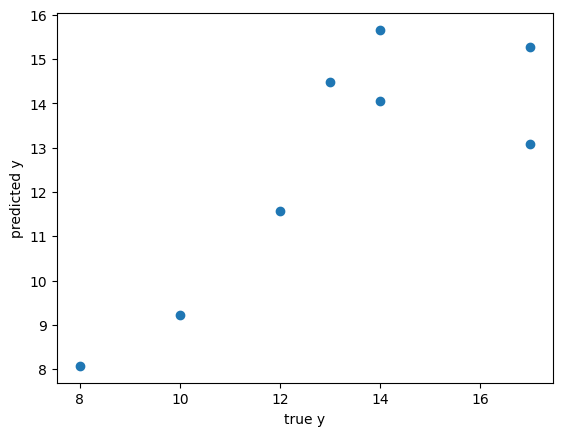

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVR

# Setting the seed of the random generator
SEED = 42

# Size of the samples in the test set: e.g., 0.1, means that the test set is composed of 10% of the samples of the entire dataset
test_size = 0.1

# Size of the samples in the validation set: e.g., 0.1, means that the test set is composed of 10% of the samples of the development set
val_size = 0.1

# Outer hold-out
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=test_size, random_state=SEED)
# Print the size of the development and test sets
print ("The development set size is", "X:", X_dev.shape, "y:", y_dev.shape)
print ("The test set size is", "X:", X_test.shape, "y:", y_test.shape)

# Inner hold-out
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=val_size, random_state=SEED)
# Print the size of the training and validation sets
print ("\nThe development set size is", "X:", X_train.shape, "y:", y_train.shape)
print ("The test set size is", "X:", X_val.shape, "y:", y_val.shape)
print()

MAE = []
C_list = [0.1, 1, 10]
for c in C_list:
    reg = SVR(kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=c, epsilon=0.1, shrinking=True, cache_size=200, verbose=0, max_iter=- 1).fit(X_train, y_train)
    y_val_pred = reg.predict(X_val)
    MAE_c = mean_absolute_error(y_val, y_val_pred)
    print ("*** C value:", c, "MAE:", MAE_c)
    MAE.append (MAE_c)
bestC_index = np.argmin(MAE)
bestC = C_list[bestC_index]
print ("\nBest C: ", bestC, "MAE", MAE[bestC_index], "years")

# Re-train the SVR model in the development test using the bestC hyperparameter
reg = SVR(kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=bestC, epsilon=0.1, shrinking=True, cache_size=200, verbose=0, max_iter=- 1).fit(X_dev, y_dev)

# Apply the model to the test set and compute the MAE
y_test_pred = reg.predict(X_test)
MAE = mean_absolute_error(y_test, y_pred)
print ("MAE test set:", MAE, "years")

# Plot predictions in the test set
plt.scatter(y_test,y_pred)
plt.xlabel('true y')
plt.ylabel('predicted y')


**Nested cross-validation**

In [ ]:
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_validate
from sklearn.svm import SVR, SVC
from sklearn.metrics import mean_absolute_error, accuracy_score

# Setting the seed of the random generator
SEED = 42

# Setting the number of folds of both outer and inner k-fold CV
outer_n_folds = 5
inner_n_folds = 5

# Settin the possible values of the C hyperparameter
C = [0.1, 1, 10]

# Creating the splitters
outer_cv = KFold(n_splits=outer_n_folds, shuffle=True, random_state=SEED)
inner_cv = KFold(n_splits=inner_n_folds, shuffle=True, random_state=SEED)

# Creating the estimator
clf = SVR(kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=0.1, epsilon=0.1, shrinking=True, cache_size=200, verbose=0, max_iter=- 1)
# Defining the grid of hyperparameter values
p_grid = [{'C': C}]

clf_gs = GridSearchCV(clf, param_grid=p_grid, cv=inner_cv, refit='neg_mean_absolute_error', scoring='neg_mean_absolute_error', n_jobs=1, verbose = 4)
nested_score = cross_validate(clf_gs, X=X, y=y, cv=outer_cv, return_train_score=True, return_estimator=True, scoring = 'neg_mean_absolute_error', n_jobs=1)

#print(np.abs(nested_score['train_score']))
#print(np.abs(nested_score['test_score']))
print("Average MAE train:", np.abs(np.mean(nested_score['train_score'])), "years")
print("Average MAE test:", np.abs(np.mean(nested_score['test_score'])), "years")

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END ............................C=0.1;, score=-2.315 total time=   0.0s
[CV 2/5] END ............................C=0.1;, score=-1.942 total time=   0.0s
[CV 3/5] END ............................C=0.1;, score=-2.458 total time=   0.0s
[CV 4/5] END ............................C=0.1;, score=-3.115 total time=   0.0s
[CV 5/5] END ............................C=0.1;, score=-3.355 total time=   0.0s
[CV 1/5] END ..............................C=1;, score=-1.614 total time=   0.0s
[CV 2/5] END ..............................C=1;, score=-1.297 total time=   0.0s
[CV 3/5] END ..............................C=1;, score=-1.571 total time=   0.0s
[CV 4/5] END ..............................C=1;, score=-2.337 total time=   0.0s
[CV 5/5] END ..............................C=1;, score=-2.101 total time=   0.0s
[CV 1/5] END .............................C=10;, score=-1.444 total time=   0.0s
[CV 2/5] END .............................C=10;, 

# Classification task

Reloading the data

In [ ]:
# df = pd.read_csv('https://raw.githubusercontent.com/sdiciotti/Age-Prediction-Demo/main/NKI2_data.csv')
df = pd.read_excel('https://raw.githubusercontent.com/sdiciotti/Age-Prediction-Demo/main/NKI2_data.xlsx')
print (type(df))
df.shape
df.dropna(axis=0, how='any', inplace=True)
print("Dataframe shape after NaN removal:", df.shape)
#print(df)

<class 'pandas.core.frame.DataFrame'>
Dataframe shape after NaN removal: (72, 35)


Defining a function to binarize age

In [ ]:
def categorize_age(age):
    if age <= 11:
        return 0
    elif age >= 12:
        return 1

Binarizing the age to obtain two classes

In [ ]:
df['Age_Category'] = df['Age'].apply(categorize_age)

#df['Age_Category'] = df['Age_Category'].astype(int)

# Count the occurrences of each unique value in the 'Age_Category' column
age_category_counts = df['Age_Category'].value_counts()

# Display the counts
print("Number of rows with Age_Category equal to 0:", age_category_counts[0])
print("Number of rows with Age_Category equal to 1:", age_category_counts[1])

Number of rows with Age_Category equal to 0: 32
Number of rows with Age_Category equal to 1: 40


A brief quality control

In [ ]:
df.tail(10)

,Age,Sex,cortex_CT,lh_cortex_CT,rh_cortex_CT,lh_frontalGM_CT,lh_occipitalGM_CT,lh_temporalGM_CT,lh_parietalGM_CT,rh_frontalGM_CT,...,lh_frontalGM_FD,lh_temporalGM_FD,lh_parietalGM_FD,lh_occipitalGM_FD,rh_cerebralGM_FD,rh_frontalGM_FD,rh_temporalGM_FD,rh_parietalGM_FD,rh_occipitalGM_FD,Age_Category
62,8,F,2.787285,2.80846,2.76611,2.907,2.246,3.126,2.610,2.791,...,2.4368,2.4145,2.4094,2.2956,2.5272,2.4263,2.4145,2.4155,2.3040,0
63,10,F,2.833485,2.84983,2.81714,2.983,2.201,3.170,2.693,2.869,...,2.4215,2.4185,2.4071,2.2692,2.5209,2.4198,2.4269,2.4107,2.2803,0
64,6,F,2.781850,2.79200,2.77170,2.951,2.137,3.004,2.636,2.863,...,2.4316,2.4022,2.4186,2.2810,2.5329,2.4242,2.3997,2.4232,2.2781,0
65,15,M,2.616905,2.65202,2.58179,2.811,1.977,2.977,2.417,2.670,...,2.4212,2.4135,2.3789,2.2515,2.4639,2.4121,2.4097,2.3865,2.1970,1
66,10,M,2.814945,2.82968,2.80021,2.916,2.197,3.148,2.673,2.910,...,2.4330,2.4237,2.4086,2.2657,2.5257,2.4331,2.4230,2.4101,2.2861,0
67,12,M,2.745725,2.74800,2.74345,2.947,2.021,3.044,2.589,2.864,...,2.4355,2.4243,2.4151,2.2684,2.5178,2.4338,2.4212,2.3990,2.2805,1
68,14,F,2.785335,2.80093,2.76974,2.956,2.067,3.147,2.646,2.908,...,2.4271,2.4132,2.3892,2.2572,2.5115,2.4230,2.4198,2.3888,2.2743,1
69,16,M,2.645850,2.62908,2.66262,2.793,2.011,2.912,2.407,2.739,...,2.4038,2.4022,2.3601,2.2468,2.5016,2.4025,2.4116,2.3767,2.2491,1
70,12,F,2.731690,2.73606,2.72732,2.854,2.052,3.025,2.599,2.790,...,2.4146,2.3960,2.3848,2.2327,2.5049,2.4108,2.3926,2.3872,2.2519,1
71,10,F,2.674965,2.67007,2.67986,2.749,2.139,3.098,2.412,2.725,...,2.4150,2.3924,2.3717,2.2553,2.5067,2.4107,2.3956,2.3772,2.2743,0


Removing the "Age" column from the data

In [ ]:
del df["Age"]

A brief quality control

In [ ]:
df.tail(10)

,Sex,cortex_CT,lh_cortex_CT,rh_cortex_CT,lh_frontalGM_CT,lh_occipitalGM_CT,lh_temporalGM_CT,lh_parietalGM_CT,rh_frontalGM_CT,rh_occipitalGM_CT,...,lh_frontalGM_FD,lh_temporalGM_FD,lh_parietalGM_FD,lh_occipitalGM_FD,rh_cerebralGM_FD,rh_frontalGM_FD,rh_temporalGM_FD,rh_parietalGM_FD,rh_occipitalGM_FD,Age_Category
62,F,2.787285,2.80846,2.76611,2.907,2.246,3.126,2.610,2.791,2.304,...,2.4368,2.4145,2.4094,2.2956,2.5272,2.4263,2.4145,2.4155,2.3040,0
63,F,2.833485,2.84983,2.81714,2.983,2.201,3.170,2.693,2.869,2.294,...,2.4215,2.4185,2.4071,2.2692,2.5209,2.4198,2.4269,2.4107,2.2803,0
64,F,2.781850,2.79200,2.77170,2.951,2.137,3.004,2.636,2.863,2.174,...,2.4316,2.4022,2.4186,2.2810,2.5329,2.4242,2.3997,2.4232,2.2781,0
65,M,2.616905,2.65202,2.58179,2.811,1.977,2.977,2.417,2.670,2.042,...,2.4212,2.4135,2.3789,2.2515,2.4639,2.4121,2.4097,2.3865,2.1970,1
66,M,2.814945,2.82968,2.80021,2.916,2.197,3.148,2.673,2.910,2.299,...,2.4330,2.4237,2.4086,2.2657,2.5257,2.4331,2.4230,2.4101,2.2861,0
67,M,2.745725,2.74800,2.74345,2.947,2.021,3.044,2.589,2.864,2.104,...,2.4355,2.4243,2.4151,2.2684,2.5178,2.4338,2.4212,2.3990,2.2805,1
68,F,2.785335,2.80093,2.76974,2.956,2.067,3.147,2.646,2.908,2.137,...,2.4271,2.4132,2.3892,2.2572,2.5115,2.4230,2.4198,2.3888,2.2743,1
69,M,2.645850,2.62908,2.66262,2.793,2.011,2.912,2.407,2.739,2.192,...,2.4038,2.4022,2.3601,2.2468,2.5016,2.4025,2.4116,2.3767,2.2491,1
70,F,2.731690,2.73606,2.72732,2.854,2.052,3.025,2.599,2.790,2.216,...,2.4146,2.3960,2.3848,2.2327,2.5049,2.4108,2.3926,2.3872,2.2519,1
71,F,2.674965,2.67007,2.67986,2.749,2.139,3.098,2.412,2.725,2.232,...,2.4150,2.3924,2.3717,2.2553,2.5067,2.4107,2.3956,2.3772,2.2743,0


In [ ]:
y = df['Age_Category']
X = df.drop(columns=['Age_Category','Sex'])

# Convert the 'Age_Category' column to integer type
df['Age_Category'] = df['Age_Category'].astype(int)

print('The whole dataset contains ' + str(X.shape[0]) + ' subjects')
print('The age prediction will be performed using ' + str(X.shape[1]) + ' MRI-derived features')


The whole dataset contains 72 subjects
The age prediction will be performed using 33 MRI-derived features


In [ ]:
X.head(3)

,cortex_CT,lh_cortex_CT,rh_cortex_CT,lh_frontalGM_CT,lh_occipitalGM_CT,lh_temporalGM_CT,lh_parietalGM_CT,rh_frontalGM_CT,rh_occipitalGM_CT,rh_temporalGM_CT,...,lh_cerebralGM_FD,lh_frontalGM_FD,lh_temporalGM_FD,lh_parietalGM_FD,lh_occipitalGM_FD,rh_cerebralGM_FD,rh_frontalGM_FD,rh_temporalGM_FD,rh_parietalGM_FD,rh_occipitalGM_FD
0,2.563765,2.53793,2.58960,2.604,2.084,2.694,2.432,2.573,2.213,2.901,...,2.4527,2.3947,2.3795,2.3840,2.2441,2.4524,2.4001,2.3942,2.3788,2.2650
1,2.816775,2.80403,2.82952,2.870,2.265,3.188,2.564,2.914,2.244,3.230,...,2.4719,2.4216,2.4228,2.3896,2.2861,2.5181,2.4290,2.4202,2.3942,2.2631
2,2.590785,2.60300,2.57857,2.659,2.058,2.877,2.537,2.649,2.083,2.787,...,2.4854,2.3733,2.3712,2.3852,2.2485,2.4820,2.3681,2.3633,2.3735,2.2511


In [ ]:
y.head(3)

0    1
1    1
2    1
Name: Age_Category, dtype: int64

**Hold-out**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score

# Setting the seed of the random generator
SEED = 42

# Size of the samples in the test set: e.g., 0.1, means that the test set is composed of 10% of the samples of the entire dataset
test_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=SEED)

# Print the shape of the training and test sets
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

# Fitting the linear model
clf = SVC(kernel='rbf', gamma='scale', C=0.1,  shrinking=True, verbose=0).fit(X_train, y_train)

# Applying the final model to the test set samples
y_pred_proba = clf.decision_function(X_test)  # probability estimates of the positive class
y_pred_proba

# Compute the MAE in the test set
AUC = roc_auc_score(y_test, y_pred_proba)
print ("ROC AUC test set:", AUC)



(57, 33) (57,)
(15, 33) (15,)
ROC AUC test set: 0.9259259259259259


**Cross validation**

In [ ]:
from sklearn.model_selection import cross_validate, KFold
from sklearn.svm import SVC

# Setting the seed of the random generator
SEED = 42

# Setting the number of folds
n_folds = 5

# Creating the estimator
clf = SVC(kernel='rbf', gamma='scale', C=0.1,  shrinking=True, verbose=0)

# Creating the splitter
cv = KFold(n_splits=n_folds, shuffle=True, random_state=SEED)

score = cross_validate(clf, X=X, y=y, cv=cv, return_train_score=True, return_estimator=True, scoring = 'roc_auc')

print("This is the score object:")
print (score)

print("Average AUC training set:", np.mean(score['train_score']))
print("Average AUC tes set:", np.mean(score['test_score']))

This is the score object:
{'fit_time': array([0.01695561, 0.02759814, 0.00506592, 0.01529765, 0.02930546]), 'score_time': array([0.01540589, 0.01792407, 0.02258396, 0.01955247, 0.01788735]), 'estimator': [SVC(C=0.1, verbose=0), SVC(C=0.1, verbose=0), SVC(C=0.1, verbose=0), SVC(C=0.1, verbose=0), SVC(C=0.1, verbose=0)], 'test_score': array([0.92592593, 1.        , 1.        , 1.        , 0.91666667]), 'train_score': array([0.97766749, 0.96338384, 0.96848485, 0.95818399, 0.98197115])}
Average AUC training set: 0.9699382649906843
Average AUC tes set: 0.9685185185185186


**Nested hold-out**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC

# Setting the seed of the random generator
SEED = 42

# Size of the samples in the test set: e.g., 0.1, means that the test set is composed of 10% of the samples of the entire dataset
test_size = 0.1

# Size of the samples in the validation set: e.g., 0.1, means that the test set is composed of 10% of the samples of the development set
val_size = 0.1

# Outer hold-out
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=test_size, random_state=SEED)
# Print the size of the development and test sets
print ("The development set size is", "X:", X_dev.shape, "y:", y_dev.shape)
print ("The test set size is", "X:", X_test.shape, "y:", y_test.shape)

# Inner hold-out
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=val_size, random_state=SEED)
# Print the size of the training and validation sets
print ("\nThe development set size is", "X:", X_train.shape, "y:", y_train.shape)
print ("The test set size is", "X:", X_val.shape, "y:", y_val.shape)
print()

AUC = []
C_list = [0.1, 1, 10]
for c in C_list:
    clf = SVC(kernel='rbf', gamma='scale', C=0.1,  shrinking=True, verbose=0).fit(X_train, y_train)
    y_val_pred_proba = clf.decision_function(X_val)
    AUC_c = roc_auc_score(y_val, y_val_pred_proba)
    print ("*** C value:", c, "AUC:", AUC_c)
    AUC.append (AUC_c)
bestC_index = np.argmax(AUC)
bestC = C_list[bestC_index]
print ("\nBest C: ", bestC, "AUC", AUC[bestC_index])

# Re-train the SVR model in the development test using the bestC hyperparameter
clf = SVC(kernel='rbf', gamma='scale', C=bestC,  shrinking=True, verbose=0).fit(X_dev, y_dev)

# Apply the model to the test set and compute the MAE
y_test_pred_proba = clf.decision_function(X_test)
AUC = roc_auc_score(y_test, y_test_pred_proba)
print ("ROC AUC test set:", AUC)


The development set size is X: (64, 33) y: (64,)
The test set size is X: (8, 33) y: (8,)

The development set size is X: (57, 33) y: (57,)
The test set size is X: (7, 33) y: (7,)

*** C value: 0.1 AUC: 0.9166666666666667
*** C value: 1 AUC: 0.9166666666666667
*** C value: 10 AUC: 0.9166666666666667

Best C:  0.1 AUC 0.9166666666666667
ROC AUC test set: 1.0


**Nested Cross validation**

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import KFold, GridSearchCV, cross_validate

SEED = 42

outer_n_folds = 5
inner_n_folds = 5
C = [0.1, 1, 10]

outer_cv = KFold(n_splits=outer_n_folds, shuffle=True, random_state=SEED)
inner_cv = KFold(n_splits=inner_n_folds, shuffle=True, random_state=SEED)

clf = SVC(degree=3, gamma='scale', coef0=0.0, tol=0.001, C=0.1,  shrinking=True, cache_size=200, verbose=0, max_iter=- 1)
p_grid = [{'C': C}]

# Exhaustive search over specified parameter values for an estimator
clf_gs = GridSearchCV(clf, param_grid=p_grid, cv=inner_cv, refit='roc_auc', scoring='roc_auc', verbose = 4)
nested_score = cross_validate(clf_gs, X=X, y=y, cv=outer_cv, return_train_score=True, return_estimator=True, scoring = 'roc_auc')

print("Average ROC AUC train:", np.mean(np.abs(nested_score['train_score'])))
print("Average ROC AUC test:", np.mean(np.abs(nested_score['test_score'])))

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END .............................C=0.1;, score=1.000 total time=   0.0s
[CV 2/5] END .............................C=0.1;, score=1.000 total time=   0.0s
[CV 3/5] END .............................C=0.1;, score=1.000 total time=   0.0s
[CV 4/5] END .............................C=0.1;, score=0.933 total time=   0.0s
[CV 5/5] END .............................C=0.1;, score=1.000 total time=   0.0s
[CV 1/5] END ...............................C=1;, score=1.000 total time=   0.0s
[CV 2/5] END ...............................C=1;, score=1.000 total time=   0.0s
[CV 3/5] END ...............................C=1;, score=1.000 total time=   0.0s
[CV 4/5] END ...............................C=1;, score=0.933 total time=   0.0s
[CV 5/5] END ...............................C=1;, score=1.000 total time=   0.0s
[CV 1/5] END ..............................C=10;, score=1.000 total time=   0.0s
[CV 2/5] END ..............................C=10;,